In [3]:
import numpy as np
import scipy as sp
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import matplotlib as mp
import sklearn
import networkx as nx
from IPython.display import Image, HTML

import laUtilities as ut

%matplotlib inline

# Network Centrality and Clustering

Now we turn to two important concepts in the analysis of networks:
* Important __nodes__, and
* Important __groups of nodes.__

The question of important nodes leads to the notion of __centrality,__

And the question of important groups of nodes leads to the notion of __clustering.__

In both cases, we will draw connections between graphs and linear algebra.

## Centrality

An common question in the analysis of networks is to understand the relative "importance" of the nodes in the network.

For example:

* in a social network, who are the most influential individuals?
* in the Web, which pages are more informative?
* in road network, which intersections are most heavily used?



The key idea is that the __structure__ of the network should give us some information about the relative importance of the nodes in the network.

To introduce concepts here, we'll look at a very famous dataset in the history of network analysis: Zachary's karate club.

The back story: from 1970 to 1972 the anthropologist Wayne Zachary studied the social relationships inside a university karate club.

While he was studying the club, a factional division led to a splitting of the club in two.   

The club became split between those who rallied around the club president, and those who rallied around the karate instructor.

```{note}
You can read the story of the Karate club [here](http://www1.ind.ku.dk/complexLearning/zachary1977.pdf).  This dataset has become so famous that it has spawned [its own academic traditions](https://networkkarate.tumblr.com).
```

Here's a view of the social network of the karate club. 

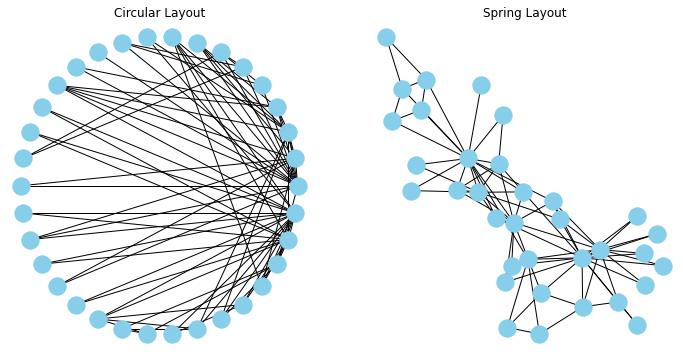

In [32]:
Gk = nx.karate_club_graph()
np.random.seed(9)
fig = plt.figure(figsize = (12, 6))
ax1 = fig.add_subplot(121)
nx.draw_networkx(Gk, ax = ax1, pos = nx.circular_layout(Gk), 
                 with_labels = False, node_color='skyblue')
plt.title('Circular Layout')
plt.axis('off')
ax2 = fig.add_subplot(122)
nx.draw_networkx(Gk, ax = ax2, pos = nx.spring_layout(Gk), 
                 with_labels = False, node_color='skyblue')
plt.title('Spring Layout')
plt.axis('off');

Do some nodes in the network have a special role?

Are some nodes more "important" than others?

These are often termed questions of __centrality__ (or __prestige__).

Today we'll study metrics for these notions.   We'll work with a graph $G$.

We will study three basic notions of centrality:
    
1. __Closeness__ Centrality:  A central node is close to all others.
2. __Betweenness__ Centrality: A central node is on many paths through the network.
3. __Status__ Centrality: A central node is connected to other central nodes.

### Closeness Centrality

The closeness centrality of a node $i$ is an indicator of the proximity between $i$ and all the other nodes in the graph.

We assume that $G$ is connected; let $d(i,j)$ be the shortest path distance between $i$ and $j$ in $G$.   

(Although other dissimilarity measures could be used.)

Then the standard way of formulating closeness centrality is the reciprocal of the total distance to all other nodes.

$$ \text{closeness}(i) = \frac{1}{\sum_{j \in V} d(i,j)}.$$

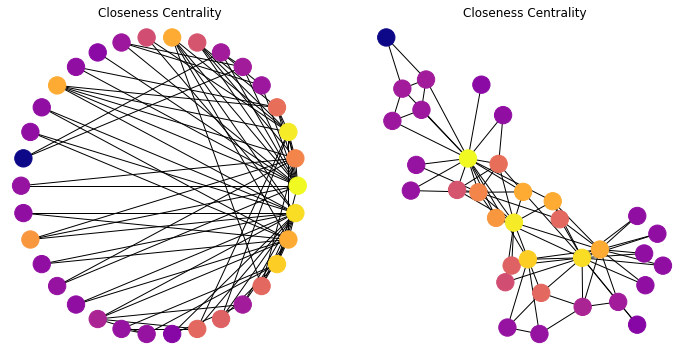

In [91]:
Gk = nx.karate_club_graph()
cent = list(nx.closeness_centrality(Gk).values())
np.random.seed(9)
fig = plt.figure(figsize = (12, 6))
ax1 = fig.add_subplot(121)
nx.draw_networkx(Gk, ax = ax1, pos = nx.circular_layout(Gk), 
                 node_color = cent,
                 cmap = plt.cm.plasma,
                 with_labels = False)
plt.title('Closeness Centrality')
plt.axis('off')
ax2 = fig.add_subplot(122)
nx.draw_networkx(Gk, ax = ax2, pos = nx.spring_layout(Gk), 
                 node_color = cent,
                 cmap = plt.cm.plasma,
                 with_labels = False)
plt.title('Closeness Centrality')
plt.axis('off');

In this graph, most nodes are close to most other nodes.   

However we can see that some nodes are slightly more central than others.

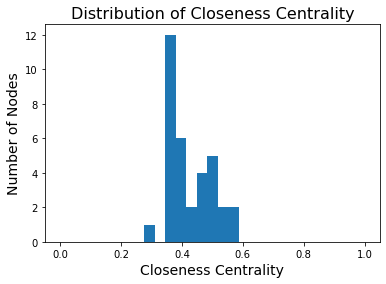

In [47]:
plt.figure(figsize = (6, 4))
plt.hist(cent, bins=np.linspace(0, 1, 30))
plt.xlabel('Closeness Centrality', size = 14)
plt.ylabel('Number of Nodes', size = 14)
plt.title('Distribution of Closeness Centrality', size = 16);

### Betweenness Centrality

Another way to think about centrality is "is the node on many paths?"

If we picture the network as a conduit for information, then betweenness captures how important a node is to the communication process (or "how much" information passes through the node).

First, let's consider the case in which there is only one shortest path between any pair of nodes.

Then, the betweenness centrality of node $i$ is the __number of shortest paths that pass through $i$.__

Mathematically:

$$ \text{betweenness}(i) = \sum_{i \neq j \neq k \in V} \left\{\begin{array}{ll}1&\text{if path from }j\text{ to }k\text{ goes through }i\\0&\text{otherwise}\end{array}\right. $$

We can convert this to a value between 0 and 1 by dividing by ${n \choose 2} = n(n-1)/2$.

Now, in a general graph, there may be __multiple__ shortest paths between $j$ and $k$.  

To handle this, we define:
* $\sigma(i \mid j,k)$ is the number of shortest paths between $j$ and $k$ that pass through $i$, and 
* $\sigma(j,k)$ is the total number of shortest paths between $j$ and $k$.

Then we define the _dependency_ of $i$ on the paths between $j$ and $k$:

$$ \text{dependency}(i \mid j,k) = \frac{\sigma(i \mid j,k )}{\sigma(j,k)} $$

You can think of this as "the probability that a shortest path between $j$ and $k$ goes through $i$."

And finally:
    
$$ \text{betweenness}(i) = \sum_{i \neq j \neq k \in V} \text{dependency}(i \mid j, k) $$

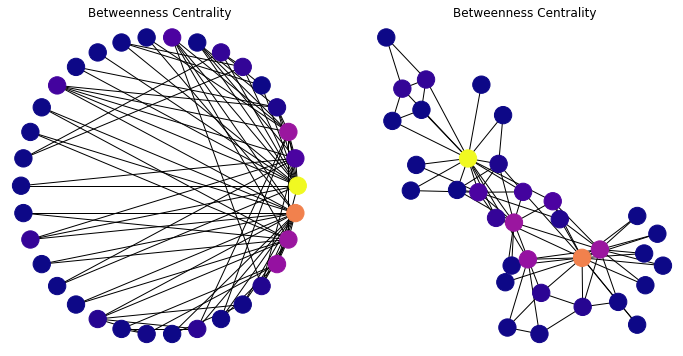

In [92]:
Gk = nx.karate_club_graph()
cent = list(nx.betweenness_centrality(Gk).values())
np.random.seed(9)
fig = plt.figure(figsize = (12, 6))
ax1 = fig.add_subplot(121)
nx.draw_networkx(Gk, ax = ax1, pos = nx.circular_layout(Gk), 
                 node_color = cent,
                 cmap = plt.cm.plasma,
                 with_labels = False)
plt.title('Betweenness Centrality')
plt.axis('off')
ax2 = fig.add_subplot(122)
nx.draw_networkx(Gk, ax = ax2, pos = nx.spring_layout(Gk), 
                 node_color = cent,
                 cmap = plt.cm.plasma,
                 with_labels = False)
plt.title('Betweenness Centrality')
plt.axis('off');

We start to see with this metric the "importance" of two or three key members of the karate club.

Note that many nodes will have a betweenness centrality of zero -- no shortest paths go through them.

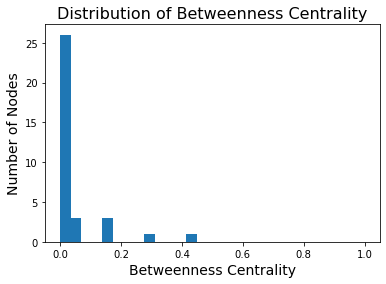

In [50]:
plt.figure(figsize = (6, 4))
plt.hist(cent, bins=np.linspace(0, 1, 30))
plt.xlabel('Betweenness Centrality', size = 14)
plt.ylabel('Number of Nodes', size = 14)
plt.title('Distribution of Betweenness Centrality', size = 16);

### Adjacency Matrices

To define the next centrality, we need to start thinking about graphs as __matrices.__

Given an $n$-node undirected graph $G = (V, E)$, its adjacency matrix $A$ is defined as:

$$ A_{ij} = \left\{ \begin{array}{ll}1 & \text{if }(i, j) \in E\\
                                    0 & \text{otherwise} \\
    \end{array}\right. $$

Here is what the adjacency matrix of the karate club graph looks like:


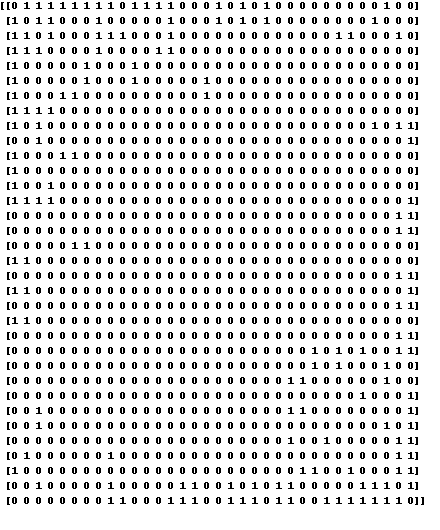

In [90]:
from PIL import Image, ImageFont, ImageDraw
from contextlib import contextmanager

@contextmanager
def show_complete_array():
    oldoptions = np.get_printoptions()
    np.set_printoptions(threshold = np.inf)
    np.set_printoptions(linewidth = 200)
    try:
        yield
    finally:
        np.set_printoptions(**oldoptions)
        
A = nx.adjacency_matrix(Gk).astype('int').todense()
with show_complete_array():
    img = Image.new('RGB', (440, 530), color = (255,255,255))
    #fnt = ImageFont.truetype("Pillow/Tests/fonts/FreeMono.ttf", 30)
    ImageDraw.Draw(img).text((0,0), str(A), fill=(0,0,0))
img

An important way to think about adjacency matrices: __column $j$ holds $j$'s neighbors.__

Note that the adjacency matrix has some important algebraic properties:
* It is nonnegative, and 
* It is symmetric.

### Status Centrality

The third notion of centrality is more subtle.   

In this context, one often talks of "prestige" rather than "centrality."  But the concepts are related.

The idea of status centrality is that __"high status" nodes are those that are connected to "high status" nodes.__

If you think this definition is circular, you are right!

Nonetheless, it leads to some metrics that are quite well defined and not hard to compute.

Let's make this definition more precise: __the centrality of a node is proportional to the sum of the centrality of its neighbors.__

Then we would say that:
    
$$ \mathbf{e}_i = 1/\lambda \sum_{(i, j) \in E} \mathbf{e}_j $$

This encodes our recursive definition for $\mathbf{e}_i$, based on a calculation that may or may not converge, depending on $\lambda.$

Now, we can write this equation in terms of the adjacency matrix $A$:
    
$$ \mathbf{e}_i = 1/\lambda \sum_j A_{ij} \mathbf{e}_j $$

Notice that this is just the definition of a matrix-vector multiplication.   

So we can write even more concisely:
    
$$ A\mathbf{e} = \lambda\mathbf{e} $$

... which means that $\mathbf{e}$ must be an eigenvector of $A$.

For this reason, status centrality is often called __eigenvector centrality.__

Which eigenvector of $A$ should we choose?   

Let's assume that the graph $G$ is connected.

Then there is a good argument for choosing the largest eigenvalue of $A$, in which case all of the entries in $\mathbf{e}$ will be nonnegative.

(This fact comes from the Perron-Frobenius theorem, which tells us that if $G$ is connected, then the largest eigenvalue of $A$ is positive and the corresponding eigenvector is nonnegative.)

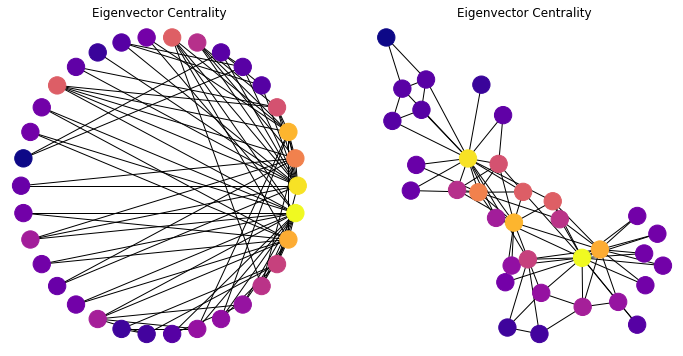

In [175]:
Gk = nx.karate_club_graph()
cent = list(nx.eigenvector_centrality(Gk).values())
np.random.seed(9)
fig = plt.figure(figsize = (12, 6))
ax1 = fig.add_subplot(121)
nx.draw_networkx(Gk, ax = ax1, pos = nx.circular_layout(Gk), 
                 node_color = cent,
                 cmap = plt.cm.plasma,
                 with_labels = False)
plt.title('Eigenvector Centrality')
plt.axis('off')
ax2 = fig.add_subplot(122)
nx.draw_networkx(Gk, ax = ax2, pos = nx.spring_layout(Gk), 
                 node_color = cent,
                 cmap = plt.cm.plasma,
                 with_labels = False)
plt.title('Eigenvector Centrality')
plt.axis('off');

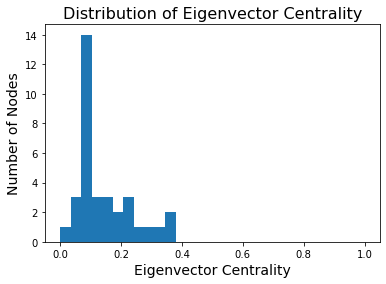

In [95]:
plt.figure(figsize = (6, 4))
plt.hist(cent, bins=np.linspace(0, 1, 30))
plt.xlabel('Eigenvector Centrality', size = 14)
plt.ylabel('Number of Nodes', size = 14)
plt.title('Distribution of Eigenvector Centrality', size = 16);

As a more detailed example, we can ask whether this definition of "prestige" applies to NCAA Division 1A football teams, based on who they play against.

(Remember this data is from 2000!)

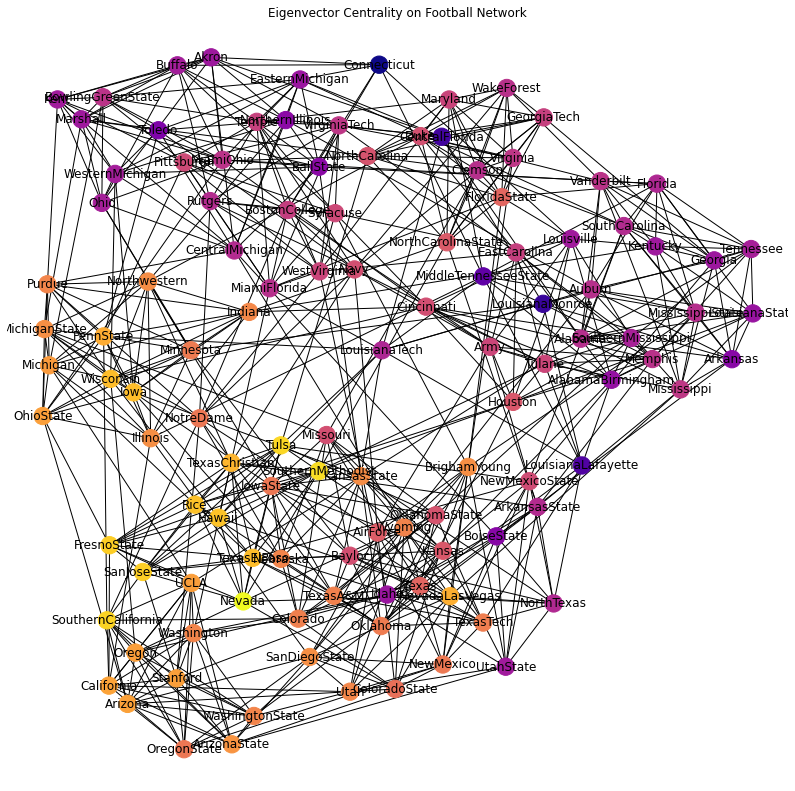

In [434]:
# data from http://www-personal.umich.edu/~mejn/netdata/
football = nx.readwrite.gml.read_gml('data/football.gml')
ec = nx.eigenvector_centrality(football)
cent = [ec[i] for i in football.nodes()]
np.random.seed(1)
fig = plt.figure(figsize = (14, 14))
nx.draw_networkx(football, 
                 pos = nx.spring_layout(football), 
                 node_color = cent,
                 cmap = plt.cm.plasma)
plt.title('Eigenvector Centrality on Football Network')
plt.axis('off');

So let's compare the three versions of centrality we've looked at:

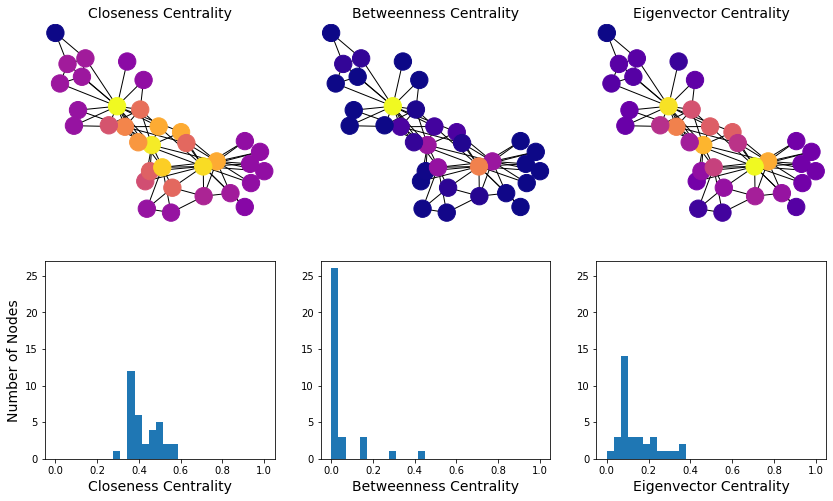

In [123]:
Gk = nx.karate_club_graph()
fn = [nx.closeness_centrality, nx.betweenness_centrality, nx.eigenvector_centrality]
title = ['Closeness Centrality', 'Betweenness Centrality', 'Eigenvector Centrality']
#
fig, axs = plt.subplots(2, 3, figsize = (14, 8))
for i in range(3):
    cent = list(fn[i](Gk).values())
    np.random.seed(9)
    nx.draw_networkx(Gk, ax = axs[0, i], 
                 pos = nx.spring_layout(Gk), 
                 node_color = cent,
                 cmap = plt.cm.plasma,
                 with_labels = False)
    axs[0, i].set_title(title[i], size = 14)
    axs[0, i].axis('off')
    #
    axs[1, i].hist(cent, bins=np.linspace(0, 1, 30))
    axs[1, i].set_ylim([0, 27])
    axs[1, i].set_xlabel(title[i], size = 14)
axs[1, 0].set_ylabel('Number of Nodes', size = 14);

In [ ]:
# consider discussing node ranking
# this is a fun paper: http://stat.wharton.upenn.edu/~steele/Courses/956/Ranking/RankingFootballSIAM93.pdf
# cite: https://epubs.siam.org/doi/10.1137/1035004
# The Perron–Frobenius Theorem and the Ranking of Football Teams
# and there is useful data here: https://www.sports-reference.com/cfb/years/2020-schedule.html

## Clustering and Partitioning

We now turn to the question of finding important __groups__ of nodes.

Why might we want to cluster graph nodes?

* Assiging computations to processors in a parallel computer
* Segmenting images (finding boundaries between objects)
* Clustering words found together in documents, or documents with similar words
* Divide and conquer algorithms
* Circuit layout in VLSI
* Community detection in social networks

### Min $s$-$t$ cut

We'll start with a problem that is fundamental to many other problems in graph analysis.

Let's say we have a graph $G$ and two nodes in mind, $s$ and $t$.  

We would like to __isolate__ $s$ from $t$.  What is the cheapest way to do it?

<!-- Image credit: On the history of the transportation and maximum flow problems. -->
<!--     Alexander Schrijver in Math Programming, 91: 3, 2002. -->
    
<center>
    
<img src="figs/L23-max-flow-soviet-rail-1955.png" width="75%">
    
</center> 

```{note}
For an interesting historical perspective on the min-cut problem and its relation to the Cold War, see
 ["On the history of the transportation and maximum flow problems,"](https://link.springer.com/article/10.1007%2Fs101070100259) by Alexander Schrijver, in Mathematical Programming 91.3 (2002): 437-445.
 ```

A min $s$-$t$ cut problem is as follows.

We are given a weighted graph $G = (V,E)$.

An $s$-$t$ cut $C$ of $G$ is a partition of $V$ into $(U, V-U)$ such that $s \in U$ and $t \in V-U$.

The __cost__ of a cut is the total weight of the edges that go between the two parts:

$$ \text{Cost}(C) = \sum_{e(u,v),\, u\in U,\, v\in V-U} w(e)$$

This is a very famous problem that can be solved in time that is polynomial in $|V|$ and $|E|$. 

Increasingly better solutions have been found over the past 60+ years.  

What can a min $s$-$t$ cut tell us about a graph?

Let's look at the karate club, in which I've highlighted the president and the instructor:  

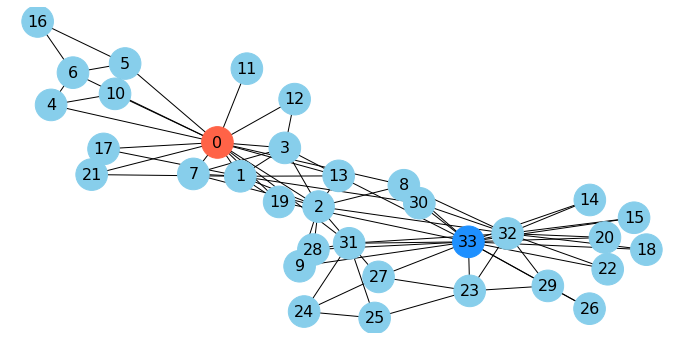

In [339]:
G=nx.karate_club_graph()
np.random.seed(9)
pos = nx.spring_layout(G)
cut_edges = nx.minimum_edge_cut(G, s=0, t=33)
#
fig = plt.figure(figsize=(12,6))
node_color = 34 * ['skyblue']
node_color[0] = 'tomato'
node_color[33] = 'dodgerblue'
nx.draw_networkx(G, pos=pos, 
                 with_labels=True, node_size=1000,
                 node_color = node_color,
                 font_size=16)
plt.axis('off');

As mentioned, when Wayne Zachary studied the club, a conflict arose between the instructor and the president (nodes 0 and 33).  

Zachary predicted the way the club would split based on an $s$-$t$ min cut.   

In fact, he __correctly__ predicted every single member's eventual association except for node 8!

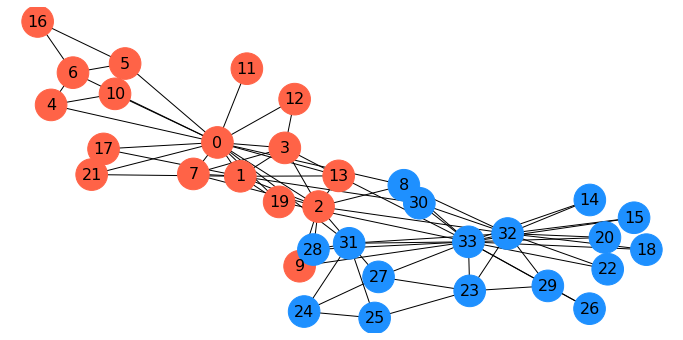

In [382]:
Gcopy = G.copy()
Gcopy.remove_edges_from(cut_edges)
cc = nx.connected_components(Gcopy)
node_set = {node: i for i, s in enumerate(cc) for node in s}
colors = ['dodgerblue', 'tomato']
node_colors = [colors[node_set[v]-1] for v in G.nodes()]
fig = plt.figure(figsize=(12,6))
nx.draw_networkx(G, node_color=node_colors, pos=pos, 
                 with_labels='True', node_size=1000, font_size=16)
plt.axis('off');

### Minimum Cuts

Now, in partitioning a graph, we may not have any particular $s$ and $t$ in mind.  

Rather, we may want to simply find the "cheapest" way to disconnect the graph.

Clearly, we can do this using $s$-$t$ min cut, by simply trying all $s$ and $t$ pairs.

<center>
    
<img src="figs/L23-min-cut.png" width="35%">
    
</center> 

Let's try this approach of finding the minimum $s-t$ cut over all possibilities in the karate club graph:

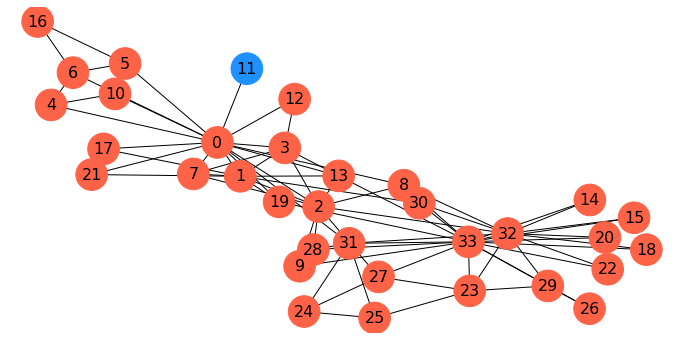

In [343]:
Gcopy = G.copy()
Gcopy.remove_edges_from(nx.minimum_edge_cut(G))
cc = nx.connected_components(Gcopy)
node_set = {node: i for i, s in enumerate(cc) for node in s}
#
colors = ['tomato', 'dodgerblue']
node_colors = [colors[node_set[v]] for v in G]
fig = plt.figure(figsize=(12,6))
nx.draw_networkx(G, node_color=node_colors, pos=pos, with_labels='True', 
                 node_size=1000, font_size=16)
plt.axis('off');

This is in fact the minimum cut: node 11 only has one edge to the rest of the graph, so the min cut is 1.

As this example shows, minimum cut is not, in general, a good approach for clustering or partitioning.

To get a more useful partition, we need to define a new goal:  finding a __balanced cut.__

### Balanced Cuts

The idea to avoid the problem above is to normalize the cut by the size of the __smaller__ of the two components.

The problem above would be avoided because the smaller of the two cuts is just a single node.

This leads us to define the __isoperimetric ratio__:
    
$$ \alpha = \frac{E(U, V\setminus U)}{\min(|U|, |V\setminus U|)} $$

And the __isoperimetric number of G:__
    
$$ \alpha(G) = \min_U \frac{E(U, V\setminus U)}{\min(|U|, |V\setminus U|)} $$

The idea is that finding $\alpha(G)$ gives a _balanced cut_ -- one that maximizes the number of disconnected nodes per edge removed.

How easily can we compute this?  

Unfortunately, it's not computable in polynomial time.

However, we can make good approximations, which we'll look at now.

To do so, we'll return to using linear algebra for graphs, and introduce __spectral graph theory.__

## Spectral Graph Theory

```{note}
If you want to study this in more detail, some excellent references are
* [Allow Me to Introduce
Spectral and Isoperimetric Graph Partitioning](https://people.eecs.berkeley.edu/~jrs/papers/partnotes.pdf) by Jonathan Shewchuck, which has outstanding visualizations and physical intuition.
* [Spectral and Algebraic Graph Theory](http://cs-www.cs.yale.edu/homes/spielman/sagt/sagt.pdf) by Daniel Spielman which provides proofs and much more detail.
```

Spectral graph theory is the use of linear algebra to study the properties of graphs.

To introduce spectral graph theory, we define some terms.

For a undirected graph $G$ having $n$ nodes, we define the $n\times n$ matrix $D$ as a diagonal matrix of node degrees.

I.e., $D = \text{diag}(d_1, d_2, d_3, \dots)$ where $d_i$ is the degree of node $i$.

Then assuming $G$ has adjacency matrix $A$, we define the __Laplacian__ of $G$ as:

$$ L = D - A $$

Here is the Laplacian matrix $L$ for the karate club network, shown as a heatmap:

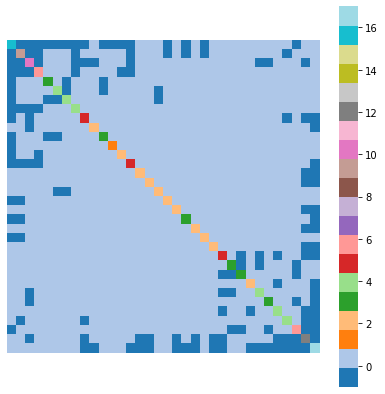

In [366]:
L = nx.laplacian_matrix(nx.karate_club_graph()).todense()
plt.figure(figsize = (7, 7))
sns.heatmap(L, cmap = plt.cm.tab20)
plt.axis('equal')
plt.axis('off');

Now let us think about an $n$-component vector $\mathbf{x} \in \mathbb{R}^n$ as an __assignment of values__ to nodes in the graph $G$.   

For example, $\mathbf{x}$ could encode node "importance" or "strength" or even a more concrete notion like "temperature" or "altitude."

Then here is an amazing fact about the Laplacian of $G$.

(For a proof you can see the notes.)
    
The quadratic form

$$ \mathbf{x}^TL\mathbf{x}$$

is exactly the same as

$$  \sum_{(i,j)\in E} (x_i - x_j)^2 $$

```{note}
To see that 

$$ \mathbf{x}^TL\mathbf{x} = \sum_{(i,j)\in E} (x_i - x_j)^2, $$

first consider $\mathbf{x}^TL\mathbf{x}$.  Writing out the quadratic form explicitly, we have that

$$ \mathbf{x}^TL\mathbf{x} = \sum_{i, j} L_{ij}x_i x_j. $$

Now, taking into account the values in $L$, we see that in the sum we will have the term $d_i x_i^2$ for each $i$, and also 2 terms of $-x_ix_j$ whenever $(i,j)\in E$.  

Turning to 

$$\sum_{(i,j)\in E} (x_i - x_j)^2 = \sum_{(i,j)\in E} x_i^2 - 2x_ix_j + x_j^2, $$

we have the same set of terms in the sum. 
```

That is, the quadratic form $ \mathbf{x}^TL\mathbf{x}$ is the sum of squared differences of $\mathbf{x}$ __over the edges in $G$.__

In other words, "When nodes have the values in $\mathbf{x}$, how much do __adjacent__ nodes vary?"

Now, let's think about vectors $\mathbf{x}$ that __minimize__ the differences over the edges in the graph.

We can think of these as "smooth" functions on the graph -- neighboring nodes don't differ too much.

To find such "smooth" vectors, we would solve this optimization:

$$ \min_{\Vert \mathbf{x}\Vert = 1}\sum_{(i,j)\in E} (x_i - x_j)^2 $$

We constrain $\mathbf{x}$ to have a nonzero norm, otherwise $\mathbf{x} = \mathbf{0}$ would be a trivial solution.

But we can express this in terms of the graph Laplacian:

$$ \min_{\Vert \mathbf{x}\Vert = 1}\sum_{(i,j)\in E} (x_i - x_j)^2 = \min_{\Vert \mathbf{x}\Vert = 1} \mathbf{x}^TL\mathbf{x} $$

Now, we know how to solve this constrained minimization!

From linear algebra, we know that when

$$ \lambda = \min_{\Vert \mathbf{x}\Vert = 1} \mathbf{x}^TL\mathbf{x} $$

then $\lambda$ is the __smallest eigenvalue of $L$__ and $\mathbf{x}$ is the corresponding eigenvector.

So ... we are connecting functions on the graph $G$ with eigenvectors of the matrix $L$.   

Quite remarkable!

Well, what do we know about $L$?

1. $L$ is __symmetric.__  Therefore the eigenvectors of $L$ are orthogonal and its eigenvalues are real.
2. $L$ is __positive semidefinite.__  Therefore the eigenvalues of $L$ are all positive or zero.  (For a proof see the notes.)

We can order the eigenvalues from largest to smallest $\lambda_n  \geq \dots \geq \lambda_2 \geq \lambda_1 \geq 0.$

```{note}
How do we know that $L$ is positive semidefinite?

Consider $ \sum_{(i,j)\in E} (x_i - x_j)^2.$  

This is always a nonnegative quantity.

So $\mathbf{x}^T L\mathbf{x} \geq 0$ for all $\mathbf{x}$, which is in fact the definition of positive-semidefiniteness.
```

Next, let's assume that $G$ is connected.

Then $L$ has a single eigenvalue of value $\lambda_1 = 0$.   The corresponding eigenvector is $\mathbf{w}_1 = \mathbf{1} = [1, 1, 1, \dots]^T$.

This is easily seen:

$$L{\mathbf 1}={\mathbf 0}.$$

Recall that row $i$ of $L$ consists of $d_i$ on the diagonal, and $d_i$ -1s in other positions.

The second-smallest eigenvalue of $L$, $\lambda_2$, is called the __Fiedler value.__

We know that all of the other eigenvectors of $L$ are orthogonal to $\mathbf 1$, because $L$ is symmetric.

Because of that, a definition of the second smallest eigenvalue is: 

$$\lambda_2 = \min_{\Vert \mathbf{x}\Vert = 1, \;\mathbf{x}\perp {\mathbf 1}} \mathbf{x}^TL\mathbf{x}$$

Note that another way of saying that $\mathbf{x} \perp {\mathbf 1}$ is that the entries of $\mathbf{x}$ sum to 0.

In other words, $\mathbf{x}$ is __mean-centered__ or __zero-mean.__

The corresponding eigenvector is called the __Fiedler vector.__

It minimizes:

$$\mathbf{w}_2 = \arg \min_{\Vert \mathbf{x}\Vert=1,\;\mathbf{x}\perp {\mathbf 1}} \sum_{(i,j)\in E} (x_i - x_j)^2$$

Let's look at this closely: 

if we think of $x_i$ as a 1-D "coordinate" for node $i$ in the graph, 

then choosing $\mathbf{x} = \mathbf{w}_2$ (the eigenvector corresponding to $\lambda_2$) puts each node in a position that minimizes the sum of the "squared stretching" of each edge.

Now, perhaps you recall that the energy in a stretched spring is proportional to the square of its stretched length.  

So imagine that we use the entries in $\mathbf{w}_2$ to position the nodes of the graph along a single dimension.

Then using the Fiedler vector $\mathbf{w}_2$ for node coordinates is __exactly the spring layout__ of nodes that we discussed in the last lecture -- __except that it is in one dimension only.__

This is the basis for the __spectral layout__ that we showed in the last lecture.

In spectral layout, we use $\mathbf{w}_2$ for the first dimension, and $\mathbf{w}_3$ for the second dimension.

$\mathbf{w}_3$ is the eigenvector corresponding to 

$$\lambda_3 = \min_{\Vert \mathbf{x}\Vert = 1, \;\mathbf{x}\perp \{\mathbf{1}, \mathbf{w}_2\}} \mathbf{x}^TL\mathbf{x}$$

Let's look again at layouts for the football network:

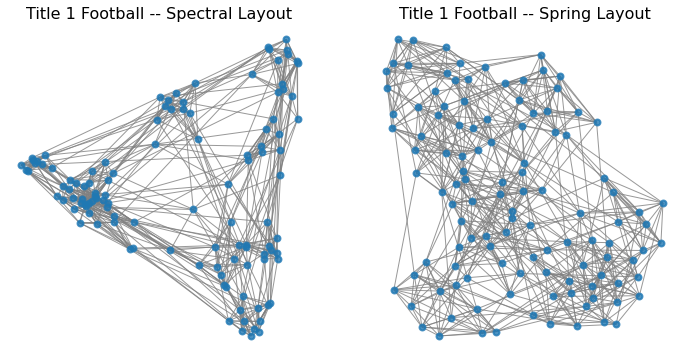

In [378]:
plt.figure(figsize = (12, 6))
ax1 = plt.subplot(121)
nx.draw_networkx(football, ax = ax1,
                 node_size=35, 
                 edge_color='gray', 
                 pos = nx.spectral_layout(football),
                 with_labels=False, alpha=.8, linewidths=2)
plt.axis('off')
plt.title('Title 1 Football -- Spectral Layout', size = 16)
ax2 = plt.subplot(122)
nx.draw_networkx(football, ax = ax2,
                 node_size=35, 
                 edge_color='gray', 
                 pos = nx.spring_layout(football, seed = 0),
                 with_labels=False, alpha=.8, linewidths=2)
plt.axis('off')
plt.title('Title 1 Football -- Spring Layout', size = 16);

So what is the difference between the spectral layout and the spring layout?

In one dimension, they are the same, but in multiple dimensions, spectral layout optimizes each dimension separately.

### Spectral Partitioning

This leads to key ideas in node partitioning.

The basic idea is to partition nodes according to the Fiedler vector $\mathbf{w}_2$.

This can be shown to have provably good performance for the __balanced cut__ problem.

```{note}
See [Spectral and Algebraic Graph Theory](http://cs-www.cs.yale.edu/homes/spielman/sagt/sagt.pdf) by Daniel Spielman, Chapter 20, where it is proved that for every $U \subset V$ with $|U| \leq |V|/2$, $\alpha(G) \geq \lambda_2 (1-s)$ where $s = |U|/|V|$.   In particular, $\alpha(G) \geq \lambda_2/2.$
```

There are a number of options for how to split based on the Fiedler vector.

If $\mathbf{w}_2$ is the Fiedler vector, then split nodes according to a value $s$:
    
* bisection: $s$ is the median value in $\mathbf{w}_2$
* ratio cut: $s$ is the value that maximizes $\alpha$
* sign: separate positive and negative vaues ($s = 0$)
* gap: separate according to the largest gap in the values of $\mathbf{w}_2$

Here is a spectral parititioning for the karate club graph:

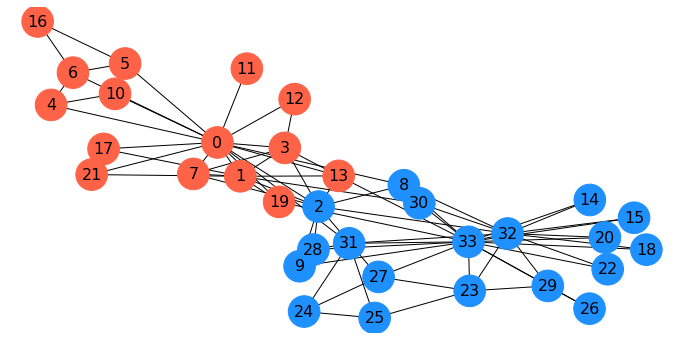

In [383]:
G = nx.karate_club_graph()
f = nx.fiedler_vector(G)
s = np.zeros(len(f), dtype='int')
s[f > 0] = 1
#
fig = plt.figure(figsize=(12,6))
colors = ['tomato', 'dodgerblue']
np.random.seed(9)
pos = nx.spring_layout(G)
node_colors = [colors[s[v]] for v in G]
nx.draw_networkx(G, pos=pos, node_color=node_colors, with_labels='True',
        node_size=1000, font_size=16)
plt.axis('off');

Interestingly, this is almost the same as the $s$-$t$ min cut  based on the president and instructor!

### Spectral Clustering

In many cases we would like to move beyond graph partitioning, to allow for clustering nodes into, say, $k$ clusters.

The idea of spectral clustering takes the observations about the Fiedler vector and extends them to more than one dimension.

Let's look again at the spectral layout of the football dataset.  

Here we've labelled the nodes according to their conference, which we will think of as ground-truth labels.

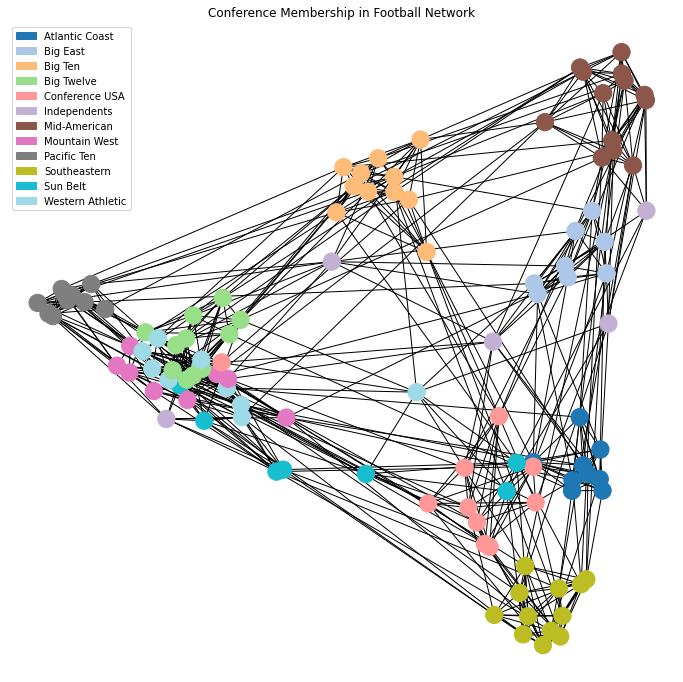

In [394]:
import matplotlib.patches as mpatches
import re
cmap = plt.cm.tab20
#
# data from http://www-personal.umich.edu/~mejn/netdata/
football = nx.readwrite.gml.read_gml('data/football.gml')
conf_name = {}
with open('data/football.txt', 'r') as fp:
    for line in fp:
        m = re.match('\s*(\d+)\s+=\s*([\w\s-]+)\s*\n', line)
        if m:
            conf_name[int(m.group(1))] = m.group(2)
conf = [d['value'] for i, d in football.nodes.data()]
#
#
plt.figure(figsize = (12, 12))
nx.draw_networkx(football,
                 pos = nx.spectral_layout(football), 
                 node_color = conf,
                 with_labels = False,
                 cmap = cmap)
plt.title('Conference Membership in Football Network')
patches = [mpatches.Patch(color = cmap(i/11), label = conf_name[i]) for i in range(12)]
plt.legend(handles = patches)
plt.axis('off');

Now, the key idea is that using spectral layout, we have placed nodes into a Euclidean space.

So ... we could use a __standard clustering algorithm__ in that space.

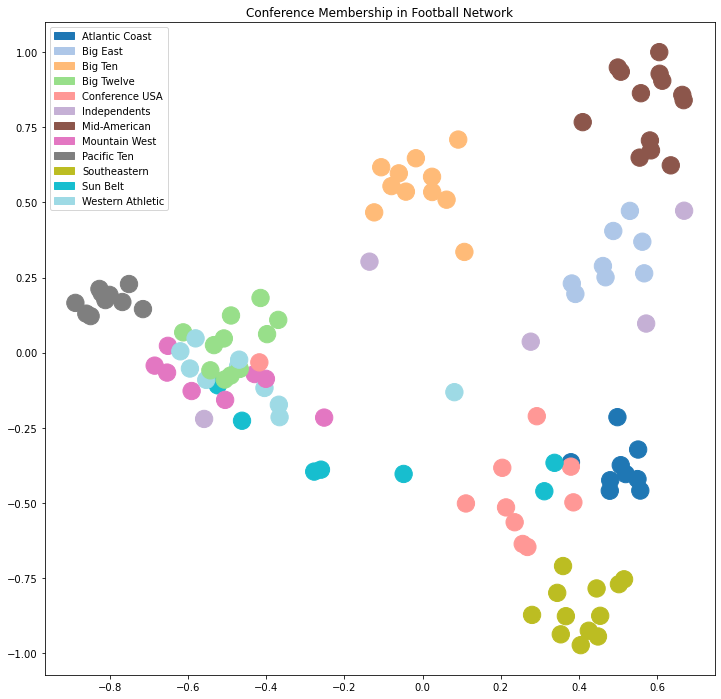

In [399]:
plt.figure(figsize = (12, 12))
nx.draw_networkx(football,
                 pos = nx.spectral_layout(football), 
                 node_color = conf,
                 with_labels = False,
                 edgelist = [],
                 cmap = cmap)
plt.title('Conference Membership in Football Network')
patches = [mpatches.Patch(color = cmap(i/11), label = conf_name[i]) for i in range(12)]
plt.tick_params(left=True, bottom=True, labelleft=True, labelbottom=True)
plt.legend(handles = patches);

Now the above plot shows that many clusters are well-separated in this space, but some still overlap.

To address this, we can use additional eigenvectors of the Laplacian, ie, $\mathbf{w}_4, \mathbf{w}_5, \dots$.

So: the idea of spectral clustering is: 
* use enough of the smallest eigenvectors of $L$ to sufficiently "spread out" the nodes
* cluster the nodes in the Euclidean space created by this embedding.

More specifically: Given a graph $G$:

* Compute $L$, the Laplacian of $G$
* Compute the smallest $d$ eigenvectors of $L$, __excluding__ the smallest eigenvector (the ones vector)
* Let $U \in \mathbb{R}^{n\times d}$ be the matrix containing the eigenvectors $\mathbf{w}_2, \mathbf{w}_3, \dots, \mathbf{w}_{d+1}$ as columns
* Let the position of each node $i$ be the point in $\mathbb{R}^d$ given by row $i$ of $U$
* Cluster the points into $k$ clusters using $k$-means

Let's explore the results of spectral clustering using $d = 2$ dimensions.

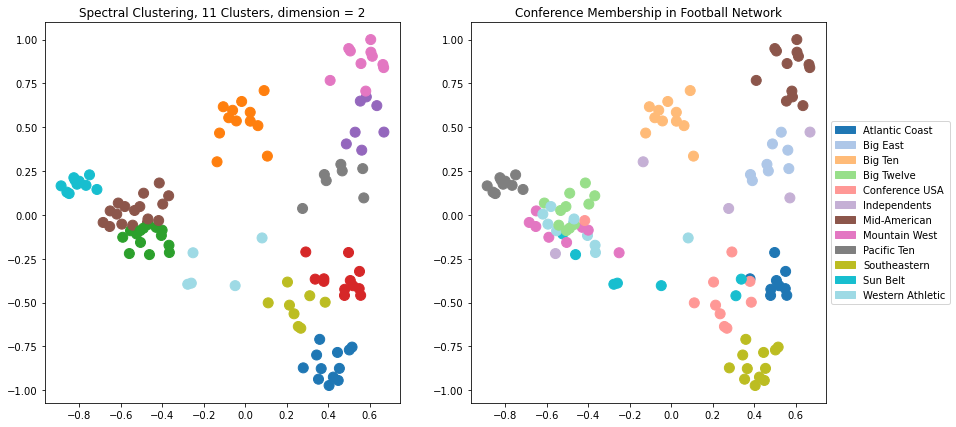

In [416]:
# Here is a complete example of spectral clustering
#
# The number of dimensions of spectral layout
k = 2
#
# Obtain the graph
football
#
# Compute the eigenvectors of its Laplacian
L = nx.laplacian_matrix(football).todense()
w, v = np.linalg.eig(L)
v = np.array(v)
# 
# scale each eigenvector by its eigenvalue
X = v @ np.diag(w)
#
# consider the eigenvectors in increasing order of their eigenvalues
w_order = np.argsort(w)
X = X[:, w_order]
#
# run kmeans using k top eigenvectors as coordinates
from sklearn.cluster import KMeans
kmeans = KMeans(init='k-means++', n_clusters=11 , n_init=10)
kmeans.fit_predict(X[:, 1:(k+1)])
centroids = kmeans.cluster_centers_
labels = kmeans.labels_
error = kmeans.inertia_
#
# visualize the result
plt.figure(figsize = (14, 7))
ax1 = plt.subplot(121)
nx.draw_networkx(football,
                 ax = ax1,
                 pos = nx.spectral_layout(football), 
                 node_color = labels,
                 with_labels = False,
                 edgelist = [],
                 cmap = cmap,
                 node_size = 100)
plt.tick_params(left=True, bottom=True, labelleft=True, labelbottom=True)
plt.title(f'Spectral Clustering, 11 Clusters, dimension = {k}')
ax2 = plt.subplot(122)
nx.draw_networkx(football,
                 ax = ax2,
                 pos = nx.spectral_layout(football), 
                 node_color = conf,
                 with_labels = False,
                 edgelist = [],
                 cmap = cmap,
                 node_size = 100)
plt.title('Conference Membership in Football Network')
patches = [mpatches.Patch(color = cmap(i/11), label = conf_name[i]) for i in range(12)]
plt.tick_params(left=True, bottom=True, labelleft=True, labelbottom=True)
plt.legend(handles = patches, loc='center left', bbox_to_anchor=(1, 0.5));

This is pretty good, but we can see that in some cases the clustering is not able to separate clusters that overlap in the visualization.

Which makes sense, as for the case $d = 2$, we are running $k$-means on the points just as we see them in the visualization.

Let's try $d = 3$.   Now there will be another dimension available to the clustering, which we can't see in the visualization.

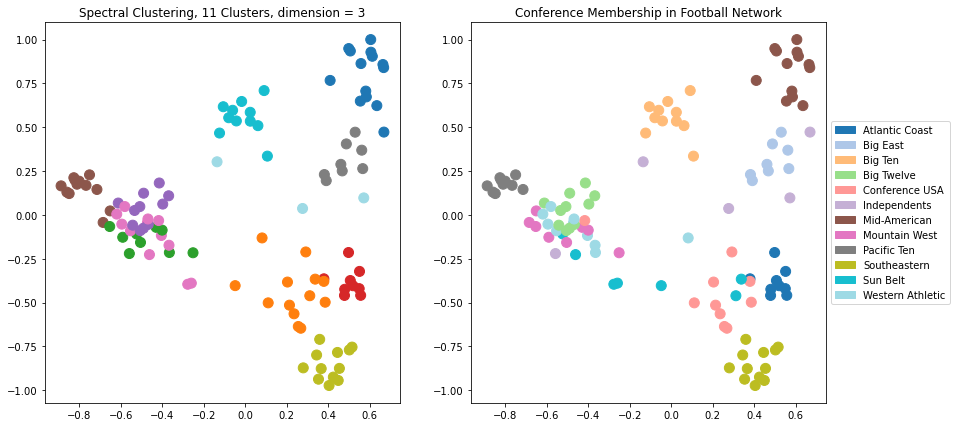

In [417]:
# Here is a complete example of spectral clustering
#
# The number of dimensions of spectral layout
k = 3
#
#
# Compute the eigenvectors of its Laplacian
L = nx.laplacian_matrix(football).todense()
w, v = np.linalg.eig(L)
v = np.array(v)
# 
# scale each eigenvector by its eigenvalue
X = v @ np.diag(w)
#
# consider the eigenvectors in increasing order of their eigenvalues
w_order = np.argsort(w)
X = X[:, w_order]
#
# run kmeans using k top eigenvectors as coordinates
from sklearn.cluster import KMeans
kmeans = KMeans(init='k-means++', n_clusters=11 , n_init=10)
kmeans.fit_predict(X[:, 1:(k+1)])
centroids = kmeans.cluster_centers_
labels = kmeans.labels_
error = kmeans.inertia_
#
# visualize the result
plt.figure(figsize = (14, 7))
ax1 = plt.subplot(121)
nx.draw_networkx(football,
                 ax = ax1,
                 pos = nx.spectral_layout(football), 
                 node_color = labels,
                 with_labels = False,
                 edgelist = [],
                 cmap = cmap,
                 node_size = 100)
plt.tick_params(left=True, bottom=True, labelleft=True, labelbottom=True)
plt.title(f'Spectral Clustering, 11 Clusters, dimension = {k}')
ax2 = plt.subplot(122)
nx.draw_networkx(football,
                 ax = ax2,
                 pos = nx.spectral_layout(football), 
                 node_color = conf,
                 with_labels = False,
                 edgelist = [],
                 cmap = cmap,
                 node_size = 100)
plt.title('Conference Membership in Football Network')
patches = [mpatches.Patch(color = cmap(i/11), label = conf_name[i]) for i in range(12)]
plt.tick_params(left=True, bottom=True, labelleft=True, labelbottom=True)
plt.legend(handles = patches, loc='center left', bbox_to_anchor=(1, 0.5));

We can see visually that using 3 dimensions is giving us a better clustering than 2 dimensions.

What happens as we increase the dimension further?

To evaluate this question we can use Adjusted Rand Index:

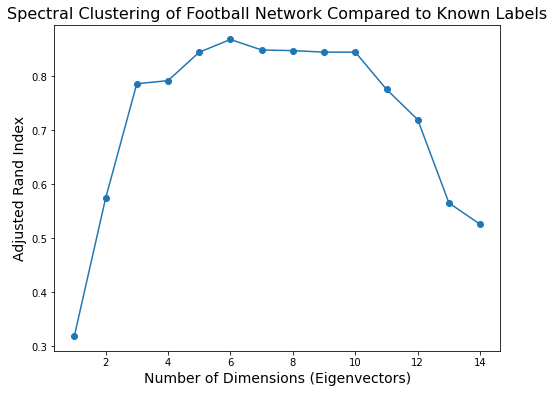

In [427]:
import sklearn.metrics as metrics
#
# Compute the eigenvectors of its Laplacian
L = nx.laplacian_matrix(football).todense()
w, v = np.linalg.eig(L)
v = np.array(v)
# 
# scale each eigenvector by its eigenvalue
X = v @ np.diag(w)
#
# consider the eigenvectors in increasing order of their eigenvalues
w_order = np.argsort(w)
X = X[:, w_order]
#
max_dimension = 15
ri = np.zeros(max_dimension - 1)
for k in range(1, max_dimension):
    # run kmeans using k top eigenvectors as coordinates
    kmeans = KMeans(init='k-means++', n_clusters = 11, n_init = 10)
    kmeans.fit_predict(X[:, 1:(k+1)])
    ri[k - 1] = metrics.adjusted_rand_score(kmeans.labels_, conf)
#
plt.figure(figsize = (8, 6))
plt.plot(range(1, max_dimension), ri, 'o-')
plt.xlabel('Number of Dimensions (Eigenvectors)', size = 14)
plt.title('Spectral Clustering of Football Network Compared to Known Labels', size = 16)
plt.ylabel('Adjusted Rand Index', size = 14);

Based on this plot, it looks like the football graph is best described as about six-dimensional.

When we embed it in six dimensions and cluster there we get an extremely high Adjusted Rand Index.

In [435]:
print(f'Maximum ARI is {np.max(ri):0.3f}, using {1 + np.argmax(ri)} dimensions for spectral embedding.')

Maximum ARI is 0.868, using 6 dimensions for spectral embedding.
